
# 1 Linear Regression Model Analysis

## 1.1 Gender Bias Analyis

In [957]:
#import necessaary library for plotting and array manipulation
import matplotlib.pyplot as plt
import numpy as np

In [958]:
#coefficients
beta0,beta1,beta2,beta3,beta4,beta5 = 50,20,0.07,10,0.01,-3

In [959]:
#set range for different features
x_gpa_array = np.arange(0, 4.5, 0.5)
x_iq_array = np.arange(70, 140, 10)
x_gender = np.array([0,1])

In [960]:
#define function
def f(x_gpa,x_iq,x_gender):
    y = beta0 + beta1*x_gpa + beta2*x_iq + beta3*x_gender + beta4*x_gpa*x_iq + beta5*x_gpa*x_gender
    return y

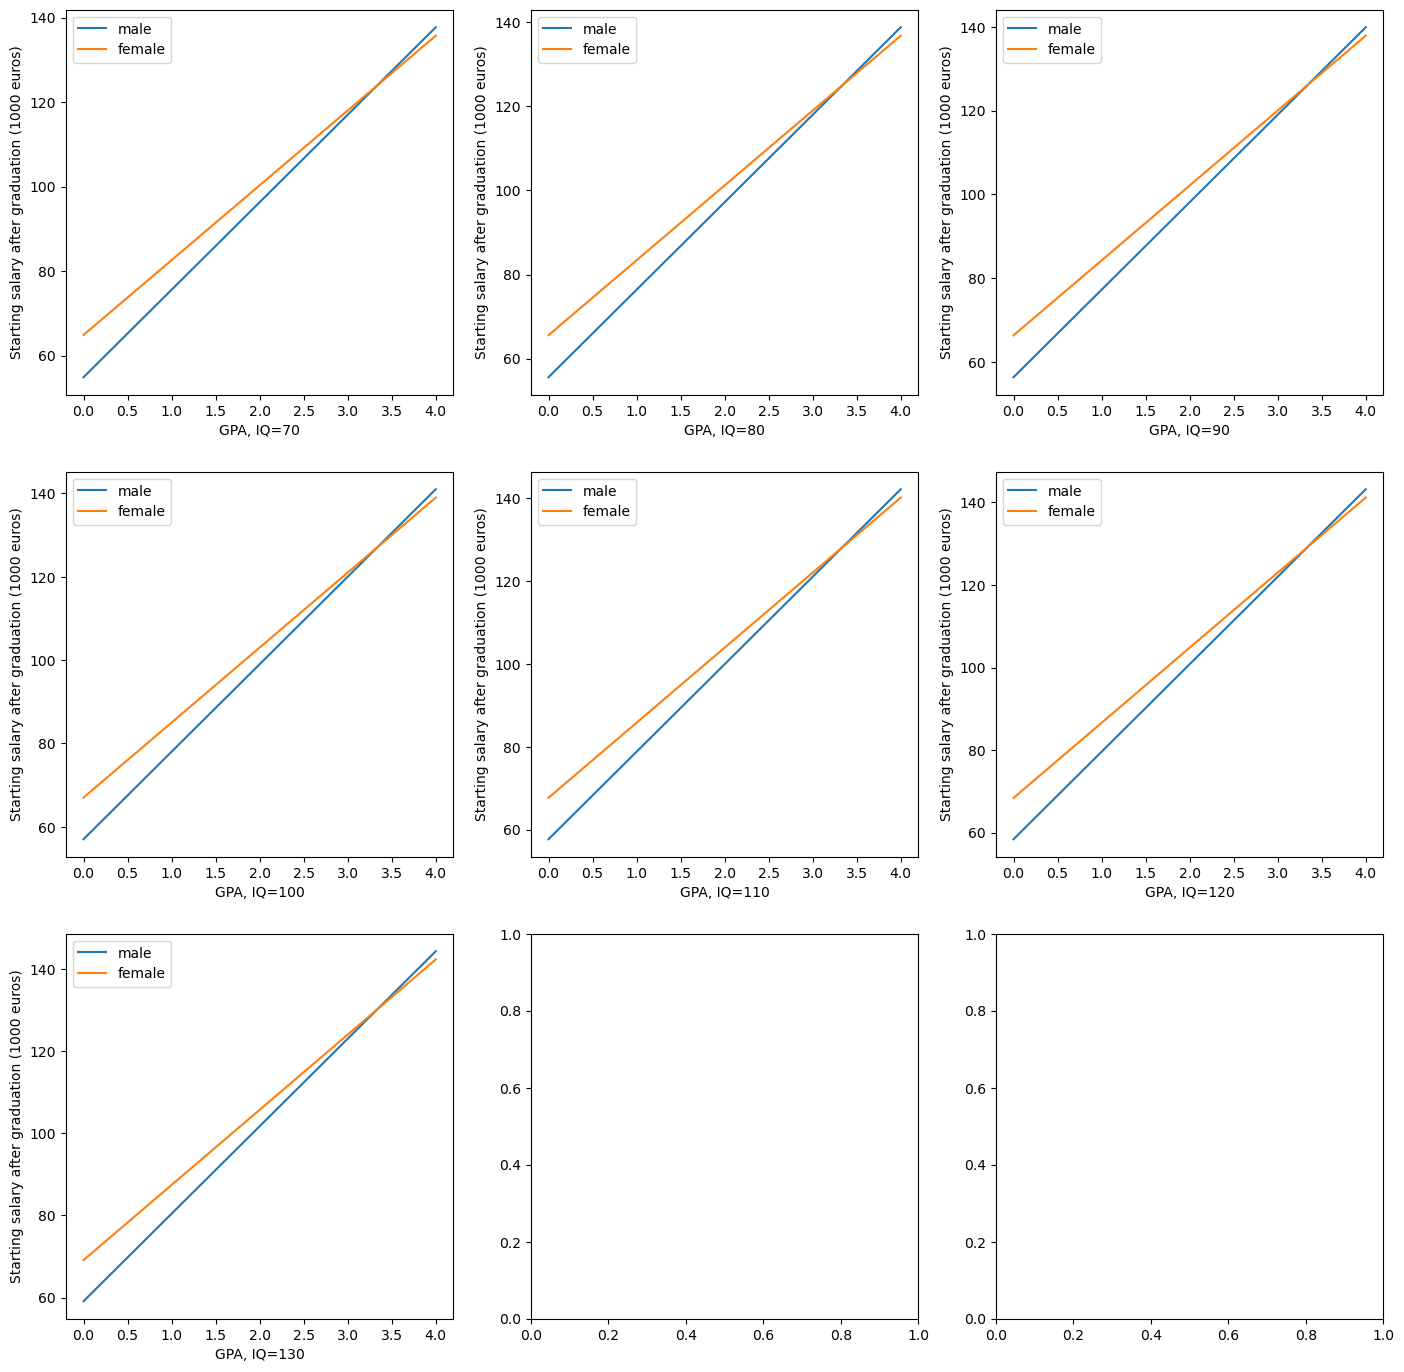

In [961]:
#first, make IQ and Gender constant, look at the relation between GPA and Starting salary, 
#compare the different tendency between female and male

x_gpa = x_gpa_array

#set subplots for better comparation
fig, axes = plt.subplots(3, 3, figsize=(17,17))
index = 0

#set different values of IQ and Gender to the function, create plots with two lines for female and male
for x_iq in x_iq_array:
    ax1 = int(index/3)
    ax2 = index % 3
    
    x_gender = np.array([0])
    y = f(x_gpa,x_iq,x_gender)
    axes[ax1][ax2].plot(x_gpa, y,label = "male")

    
    x_gender = np.array([1])
    y = f(x_gpa,x_iq,x_gender)
    axes[ax1][ax2].plot(x_gpa, y,label = "female")
    
    axes[ax1][ax2].set_xlabel('GPA, IQ=%i'%x_iq)
    axes[ax1][ax2].set_ylabel('Starting salary after graduation (1000 euros)')
    axes[ax1][ax2].legend()

    index = index + 1


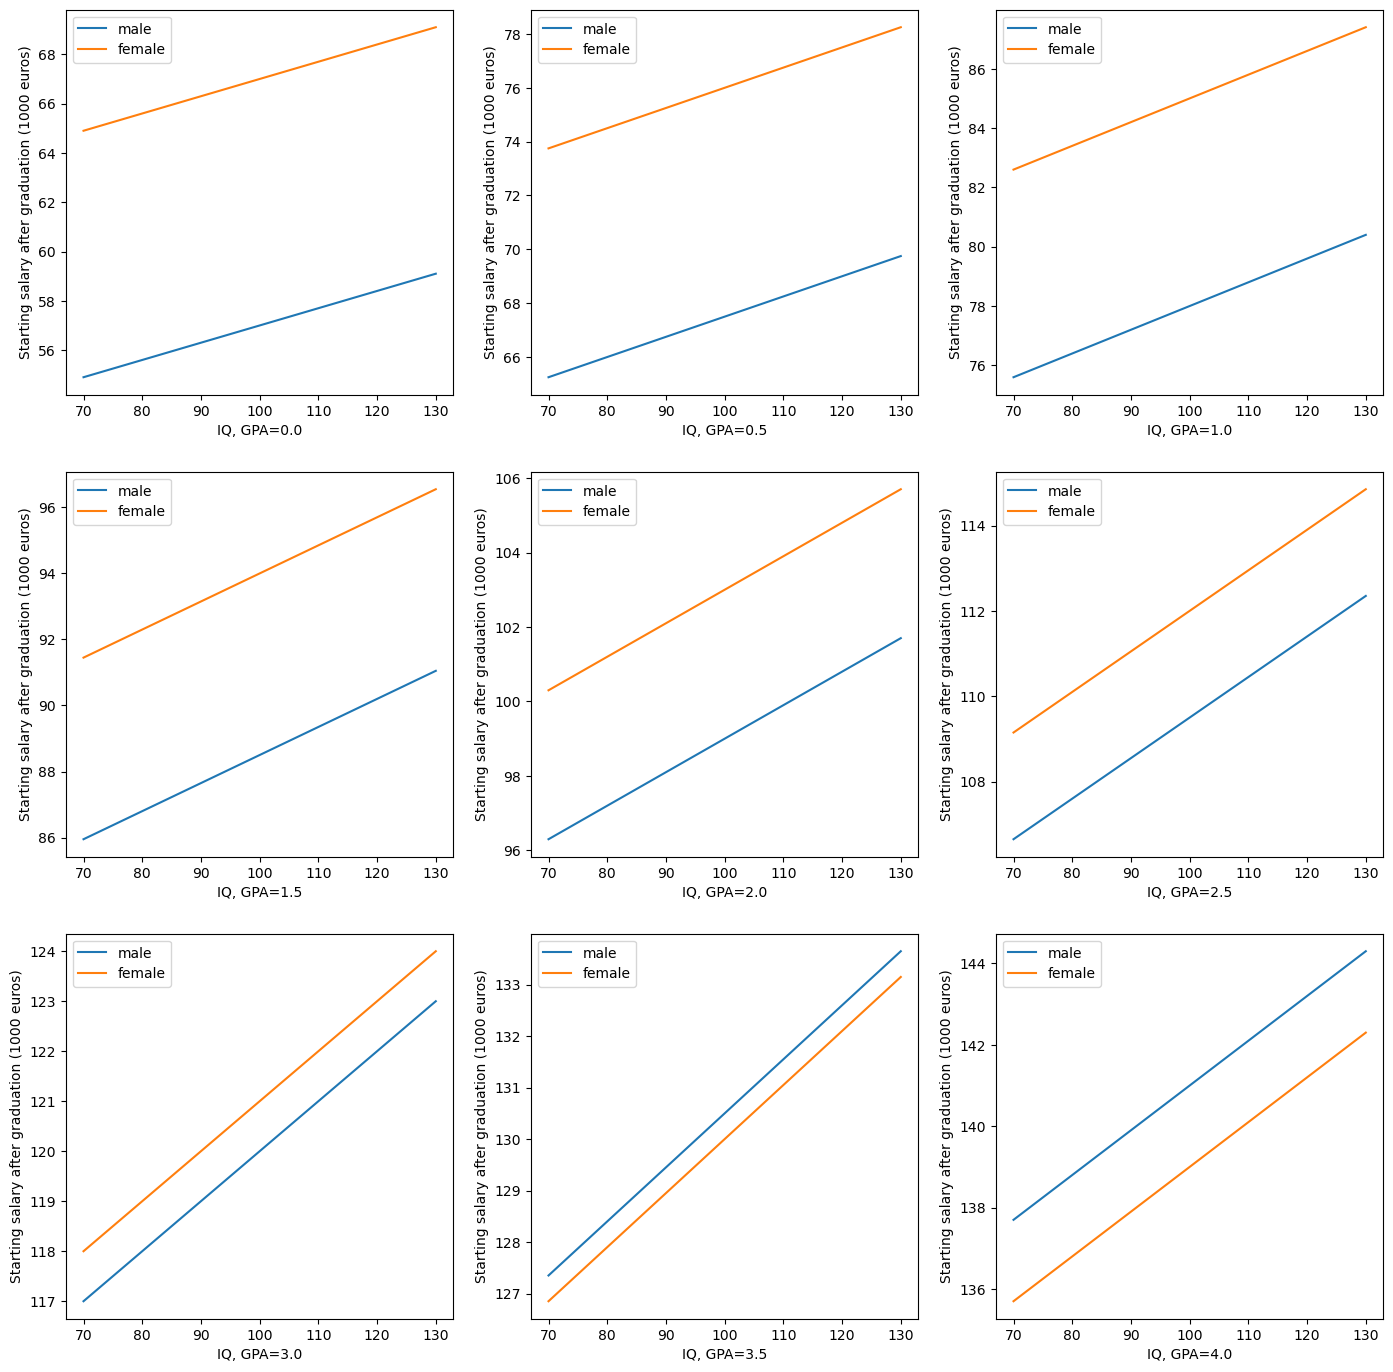

In [962]:
#second, make GPA and Gender constant, look at the relation between IQ and Starting salary, 
#compare the different tendency between female and male

x_iq = x_iq_array

#set subplots for better comparation
fig, axes = plt.subplots(3, 3, figsize=(17,17))
index = 0

#set different values of GPA and Gender to the function, create plots with two lines for female and male
for x_gpa in x_gpa_array:
    ax1 = int(index/3)
    ax2 = index % 3
    
    x_gender = np.array([0])
    y = f(x_gpa,x_iq,x_gender)
    axes[ax1][ax2].plot(x_iq, y,label = "male")
    
    x_gender = np.array([1])
    y = f(x_gpa,x_iq,x_gender)
    axes[ax1][ax2].plot(x_iq, y,label = "female")
    
    axes[ax1][ax2].set_xlabel('IQ, GPA=%.1f'%x_gpa)
    axes[ax1][ax2].set_ylabel('Starting salary after graduation (1000 euros)')
    axes[ax1][ax2].legend()
    
    index = index + 1

## 1.2 Model Conversion
 
 please look at the analytical report.


# 2 Data Generation and Model Fitting

## 2.1 First Data Generation

In [963]:
from numpy import sqrt

In [964]:
np.random.seed(42)

mu, sigma = 0.0, sqrt(1) # mean and standard deviation
x = np.random.normal(mu, sigma, 100)
x

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [965]:
mu, sigma = 0.0, sqrt(0.25) # mean and standard deviation
eps = np.random.normal(mu, sigma, 100)
eps

array([-0.70768537, -0.21032266, -0.17135726, -0.40113863, -0.08064286,
        0.20202543,  0.94309295,  0.08728891,  0.1287752 , -0.03722296,
       -0.95938561, -0.01325694,  0.0301151 ,  1.23162106, -0.09618048,
        0.15077367, -0.01735588, -0.58433902,  0.57141141,  0.37596652,
        0.39551597, -0.45469373,  0.70139716, -0.70092553,  0.29342855,
        1.09522781, -0.49526816, -0.28314886,  0.04982568, -0.25173783,
       -0.77533172,  0.03428149, -0.53115186,  0.23679622, -0.45971212,
        0.7749672 , -0.39162665, -0.16103076,  0.40675861, -0.61543216,
        0.11372997,  0.65357138, -0.80374162,  0.09231693,  0.1299414 ,
        0.39091144, -0.61847536, -0.66022831,  0.26097078,  0.14849234,
        0.12524643,  0.1732241 , -0.34001236,  0.11612685,  0.14653624,
       -0.35717571,  0.93288726,  0.23691646, -0.59565175,  0.3282768 ,
       -0.48734084,  0.3935423 ,  0.57929779, -0.41034116,  0.48168806,
        0.20639046,  0.41103008,  0.94839649, -0.12269406, -0.37

In [966]:
y = -0.5 + 0.75*x + eps

a What is the length of the vector y? <br>
  The length of the vector y is 100.
  
b What are the values of β0 and β1 in this linear model?<br>
  β0 = -0.5, β1 = 0.75 

## 2.2 First Data Visualization

Text(0, 0.5, 'y')

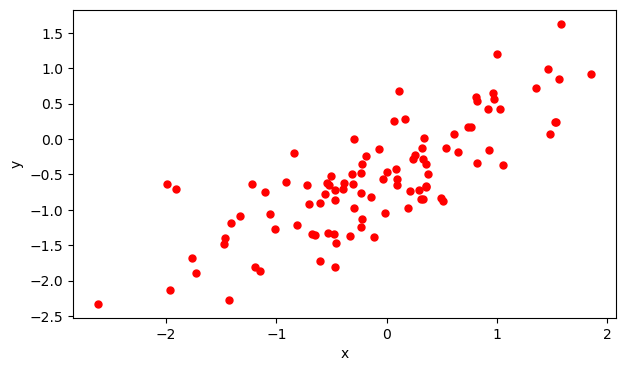

In [967]:
plt.scatter(x, y, s = 25, color='red')
plt.xlabel('x')
plt.ylabel('y')

## 2.3 Fitting First Linear Regression

In [968]:
from sklearn.linear_model import LinearRegression

In [969]:
#reshape x from 1D array into 2D vector for training
x = x.reshape(-1,1)
x.shape

(100, 1)

In [970]:
model_1 = LinearRegression()
model_1.fit(x, y)

LinearRegression()

In [971]:
model_1.coef_

array([0.67837142])

In [972]:
model_1.intercept_

-0.49628608506801636

Text(0, 0.5, 'y')

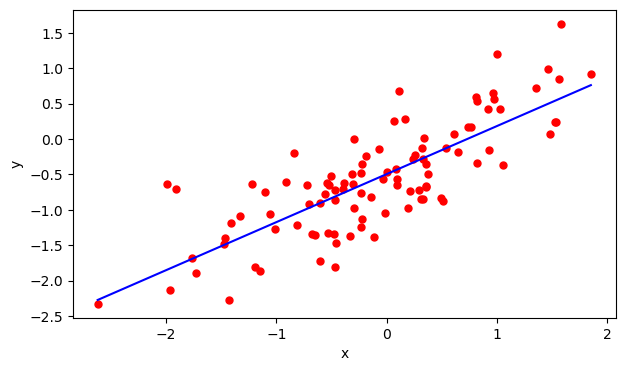

In [973]:
plt.scatter(x, y, s = 25, color='red')

#sort x in order to plot the line, without changing the regression model
x_sort = np.sort (x, 0)

plt.plot(x_sort, model_1.predict(x_sort),color='b')
plt.xlabel('x')
plt.ylabel('y')

In [974]:
from sklearn.metrics import r2_score

y_pred = model_1.predict(x)
r2_score(y, y_pred)

0.6297598193059208

## 2.4 Fitting Second Linear Regression

In [975]:
from sklearn.preprocessing import PolynomialFeatures

In [976]:
#add polynomial features to the regression model

poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x)
x_poly.shape

(100, 3)

In [977]:
model_2 = LinearRegression()
model_2.fit(x_poly, y)

LinearRegression()

In [978]:
model_2.coef_

array([0.        , 0.71212835, 0.09221497])

In [979]:
model_2.intercept_

-0.5690705740231349

Text(0, 0.5, 'y')

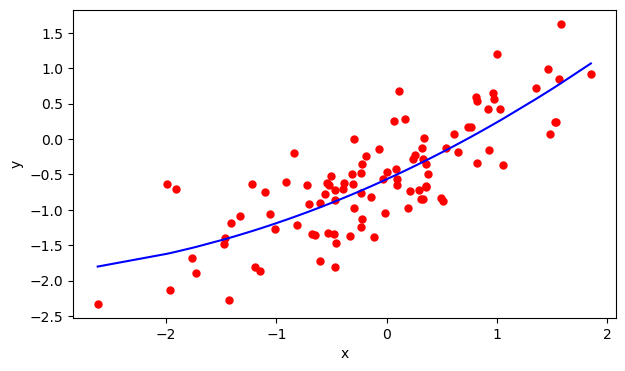

In [980]:
plt.scatter(x, y, s = 25, color='red')

#sort x in order to plot the curve without changing the regression model
x_poly_sort = poly_features.fit_transform(x_sort)

plt.plot(x_sort, model_2.predict(x_poly_sort),color='b')
plt.xlabel('x')
plt.ylabel('y')

In [981]:
y_pred = model_2.predict(x_poly)
r2_score(y, y_pred)

0.6469951045504286

## 2.5 Second Data Generation

In [982]:
#reshape x from 2D vector into 1D array
x = x.reshape(-1)
x.shape

(100,)

In [983]:
y = -0.5 + 0.75*x + x**2 + eps

## 2.6 Second Data Visualization

Text(0, 0.5, 'y')

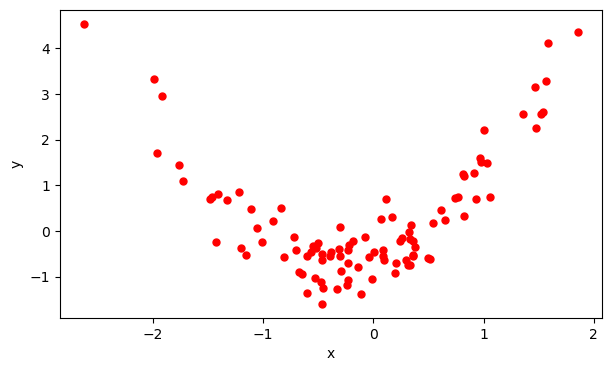

In [984]:
plt.scatter(x, y, s = 25, color='red')
plt.xlabel('x')
plt.ylabel('y')

## 2.7 Fitting Third Linear Regression

In [985]:
#reshape x from 1D array into 2D vector for training
x = x.reshape(-1,1)

In [986]:
model_3 = LinearRegression()
model_3.fit(x, y)

LinearRegression()

In [987]:
model_3.coef_

array([0.31230364])

In [988]:
model_3.intercept_

0.29300534450521215

Text(0, 0.5, 'y')

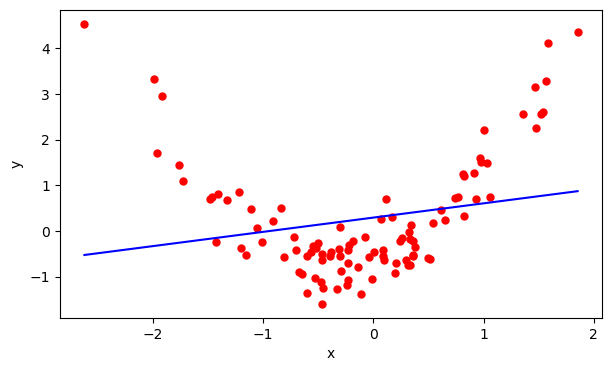

In [989]:
plt.scatter(x, y, s = 25, color='red')
plt.plot(x_sort,model_3.predict(x_sort), color='b')

plt.xlabel('x')
plt.ylabel('y')

In [990]:
y_pred = model_3.predict(x)
r2_score(y, y_pred)

0.045956423052825435

## 2.8 Fitting Fourth Linear Regression

In [991]:
model_4 = LinearRegression()
model_4.fit(x_poly, y)

LinearRegression()

In [992]:
model_4.coef_

array([0.        , 0.71212835, 1.09221497])

In [993]:
model_4.intercept_

-0.5690705740231345

Text(0, 0.5, 'y')

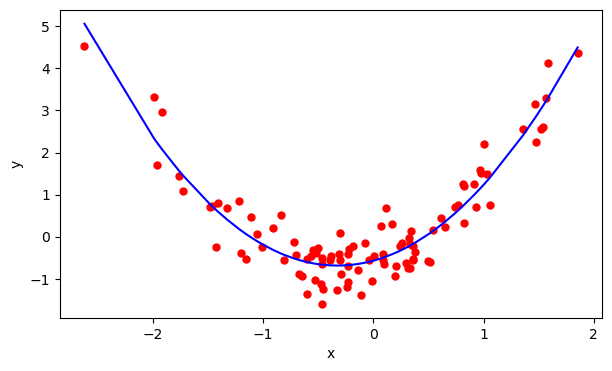

In [994]:
plt.scatter(x, y, s = 25, color='red')
plt.plot(x_sort, model_4.predict(x_poly_sort),color='b')

plt.xlabel('x')
plt.ylabel('y')

In [995]:
y_pred = model_4.predict(x_poly)
r2_score(y, y_pred)

0.8784561474099986

# 3 LASSO Regression Model Analysis

In [996]:
from sklearn.linear_model import Lasso

## 3.1 Fitting First Data with Lasso Regression Model

In [997]:
#reshape x from 2D vector into 1D array
x = x.reshape(-1)
x.shape

(100,)

In [998]:
y = -0.5 + 0.75*x + eps
y.shape

(100,)

In [999]:
#reshape x from 1D array into 2D vector  
x = x.reshape(-1,1)

In [1000]:
#initial regularization parameter alpha
alpha=0.5
model_5 = Lasso(alpha=alpha)
model_5.fit(x, y)

Lasso(alpha=0.5)

In [1001]:
model_5.coef_

array([0.06601819])

In [1002]:
model_5.intercept_

-0.5598768350004352

Text(1, -2, 'alpha = 0.5')

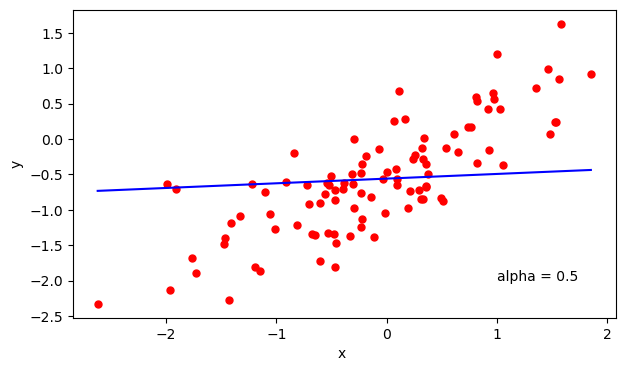

In [1003]:
plt.scatter(x, y, s = 25, color='red')

x_sort = np.sort (x, 0)
plt.plot(x_sort,model_5.predict(x_sort), color='b')

plt.xlabel('x ')
plt.ylabel('y')
plt.text(1, -2, 'alpha = 0.5', fontsize = 10)

In [1004]:
y_pred = model_5.predict(x)
r2_score(y, y_pred)

0.11661035145191212

In [1005]:
#make alpha smaller to make the bias lower

In [1006]:
alpha=0.01
model_5 = Lasso(alpha=alpha)
model_5.fit(x, y)

Lasso(alpha=0.01)

In [1007]:
model_5.coef_

array([0.66612436])

In [1008]:
model_5.intercept_

-0.4975579000666648

Text(1, -2, 'alpha = 0.01')

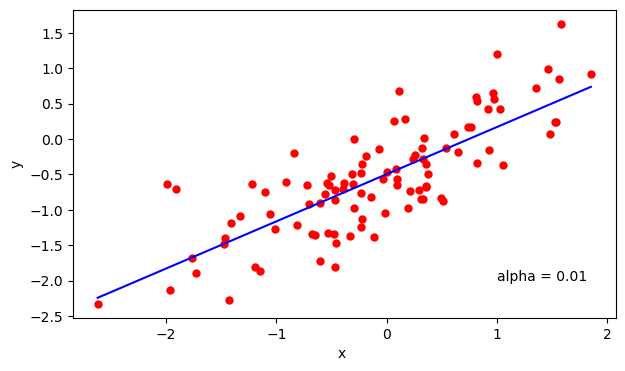

In [1009]:
plt.scatter(x, y, s = 25, color='red')

x_sort = np.sort (x, 0)
plt.plot(x_sort,model_5.predict(x_sort), color='b')

plt.xlabel('x ')
plt.ylabel('y')
plt.text(1, -2, 'alpha = 0.01', fontsize = 10)

In [1010]:
y_pred = model_5.predict(x)
r2_score(y, y_pred)

0.6295545595187795

## 3.2 Fitting Second Data with Lasso Regression Model

In [1011]:
x = x.reshape(-1)
x.shape

(100,)

In [1012]:
y = -0.5 + 0.75*x + x**2 + eps
y.shape

(100,)

In [1013]:
x = x.reshape(-1,1)
x.shape

(100, 1)

In [1014]:
alpha=0.01
model_6 = Lasso(alpha=alpha)
model_6.fit(x, y)

Lasso(alpha=0.01)

In [1015]:
model_6.coef_

array([0.30005657])

In [1016]:
model_6.intercept_

0.2917335295065637

Text(1, -1.5, 'alpha = 0.01')

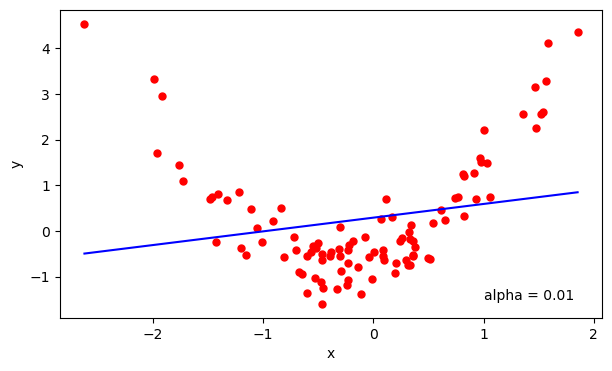

In [1017]:
plt.scatter(x, y, s = 25, color='red')

plt.plot(x_sort, model_6.predict(x_sort), color='b')

plt.xlabel('x')
plt.ylabel('y')
plt.text(1, -1.5, 'alpha = 0.01', fontsize = 10)

In [1018]:
y_pred = model_6.predict(x)
r2_score(y, y_pred)

0.045885749626953465

## 3.3 Fitting Second Data with Polynomial Features of Lasso Regression Model

In [1019]:
#because of the poor performance for linear model, add polynomial features into Lasso model
from sklearn.pipeline import make_pipeline

In [1020]:
x.shape

(100, 1)

In [1021]:
#initial parameters
degree = 2
alpha=0.5

model_7 = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
model_7.fit(x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=0.5))])

Text(1, -1.5, 'alpha = 0.5')

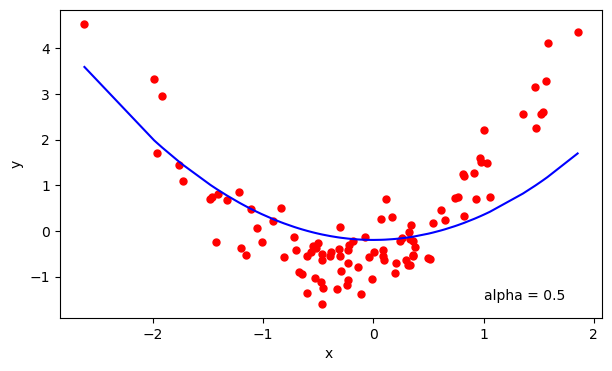

In [1022]:
plt.scatter(x, y, s = 25, color='red')

plt.plot(x_sort, model_7.predict(x_sort), color='b')

plt.xlabel('x ')
plt.ylabel('y')
plt.text(1, -1.5, 'alpha = 0.5', fontsize = 10)

In [1023]:
y_pred = model_7.predict(x)
r2_score(y, y_pred)

0.5499349687699652

In [1024]:
#make alpha smaller to make bias lower

In [1025]:
degree = 2
alpha=0.01
model_7 = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
model_7.fit(x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('lasso', Lasso(alpha=0.01))])

Text(1, -1.5, 'alpha = 0.01')

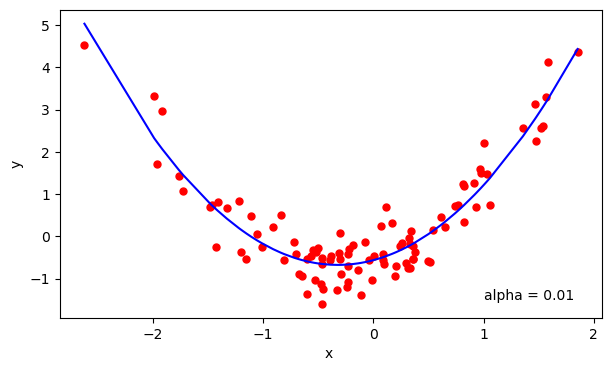

In [1026]:
plt.scatter(x, y, s = 25, color='red')

plt.plot(x_sort, model_7.predict(x_sort), color='b')

plt.xlabel('x ')
plt.ylabel('y')
plt.text(1, -1.5, 'alpha = 0.01', fontsize = 10)

In [1027]:
y_pred = model_7.predict(x)
r2_score(y, y_pred)

0.8782964037990675